# Implementierung Algae Modell

## Bibs und packages 

In [1]:
from copy import deepcopy

In [2]:
%load_ext autoreload
%autoreload 2 
# from mempyDEB.DEBIBM import test
from mempyDEB.DEBIBM.simulators import * # imports functions to run models
from mempyDEB.DEBIBM.defaultparams import * # imports default parameters
from mempyDEB.DEBIBM.model import * #import model
import mempyDEB
mempyDEB.__file__

using local version


'c:\\users\\valen\\desktop\\projekte\\phytoplankton_deb_ibm\\mempydeb\\mempyDEB\\__init__.py'

## Tes Algae model alone 

In [3]:
p = deepcopy(defaultparams_DEBIBM)
#p.glb['tspan'] = (0,14)
p.glb['N_0']= 0 #No Daphnia 
#p.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
#p.glb['tres']=24

In [4]:
sim = simulate_DEBIBM(p) # runs the baseline model (a variant of DEBkiss) with default parameters
mout, aout = sim 

  0%|          | 0/3 [00:00<?, ?it/s]c:\users\valen\desktop\projekte\phytoplankton_deb_ibm\mempydeb\mempyDEB\DEBIBM\model.py:620: RuntimeWarning: invalid value encountered in log2
  return 1 - np.exp(-np.log2(fract))
 33%|███▎      | 1/3 [00:00<00:00,  2.09it/s]c:\users\valen\desktop\projekte\phytoplankton_deb_ibm\mempydeb\mempyDEB\DEBIBM\model.py:620: RuntimeWarning: invalid value encountered in log2
  return 1 - np.exp(-np.log2(fract))
 67%|██████▋   | 2/3 [00:00<00:00,  2.13it/s]c:\users\valen\desktop\projekte\phytoplankton_deb_ibm\mempydeb\mempyDEB\DEBIBM\model.py:620: RuntimeWarning: invalid value encountered in log2
  return 1 - np.exp(-np.log2(fract))
100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


In [8]:
sim = simulate_DEBIBM(p) # runs the baseline model (a variant of DEBkiss)
mout, aout = sim 
mout.head(10) #see results

100%|██████████| 3/3 [00:01<00:00,  2.65it/s]


,index,t_day,X,Q,P,N_tot,M_tot,aging_mortality,starvation_mortality,toxicity_mortality,replicate,C_W
0,0,0.0,2.000000,1.000000,2.000000,0,0.0,0,0,0,0,0
1,1,0.0,2.009898,0.995942,1.998641,0,0.0,0,0,0,0,0
2,2,1.0,6.559705,0.296923,1.675839,0,0.0,0,0,0,0,0
3,3,2.0,20.428695,0.190891,1.162527,0,0.0,0,0,0,0,0
4,4,3.0,60.806324,0.570954,0.407086,0,0.0,0,0,0,0,0
5,5,4.0,168.632918,0.742766,0.007672,0,0.0,0,0,0,0,0
6,6,5.0,243.937640,0.609607,0.002813,0,0.0,0,0,0,0,0
7,7,6.0,216.159666,0.525279,0.003479,0,0.0,0,0,0,0,0
8,8,7.0,192.761529,0.473719,0.004328,0,0.0,0,0,0,0,0
9,9,8.0,178.234693,0.442276,0.005032,0,0.0,0,0,0,0,0


Visualize Algae (X), Phosphorus content in the algae population (Q) and extern phosphorus (P). <br> 
Assumptions: <br>
- No Chemichal effect yet, <br>


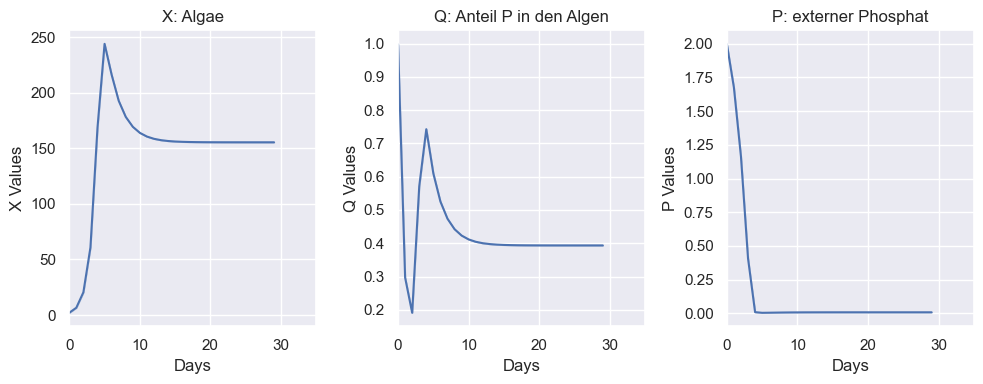

In [9]:
fig, ax = plt.subplots(ncols = 3, figsize = (10,4))

sns.lineplot(data=mout, x='t_day',y='X', ax= ax[0] )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout, x='t_day',y='Q', ax= ax[1] )
ax[1].set_title('Q: Anteil P in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout, x='t_day',y='P', ax= ax[2] )
ax[2].set_title('P: externer Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].set_xlim(0,35)

plt.tight_layout()
plt.show()

Test and visualize effekt of chemichals in the the algae population: 

In [10]:
C_W_vals = [0, 100, 200, 500] 
sim_chem = exposure_DEBIBM(p, C_W_vals)
mout_c, aout_C = sim_chem 


100%|██████████| 3/3 [00:01<00:00,  2.95it/s]


In [11]:
mout_c

,index,t_day,X,Q,P,N_tot,M_tot,aging_mortality,starvation_mortality,toxicity_mortality,replicate,C_W
0,0,0.0,2.000000,1.000000e+00,2.000000,0,0.0,0,0,0,0,0
1,1,0.0,2.009898,9.959417e-01,1.998641,0,0.0,0,0,0,0,0
2,2,1.0,6.559705,2.969233e-01,1.675839,0,0.0,0,0,0,0,0
3,3,2.0,20.428695,1.908907e-01,1.162527,0,0.0,0,0,0,0,0
4,4,3.0,60.806324,5.709544e-01,0.407086,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26,26,25.0,0.000073,5.564842e-07,0.400009,0,0.0,0,0,0,2,500
27,27,26.0,0.000048,3.208617e-07,0.400005,0,0.0,0,0,0,2,500
28,28,27.0,0.000031,1.850047e-07,0.400003,0,0.0,0,0,0,2,500
29,29,28.0,0.000020,1.066713e-07,0.400002,0,0.0,0,0,0,2,500


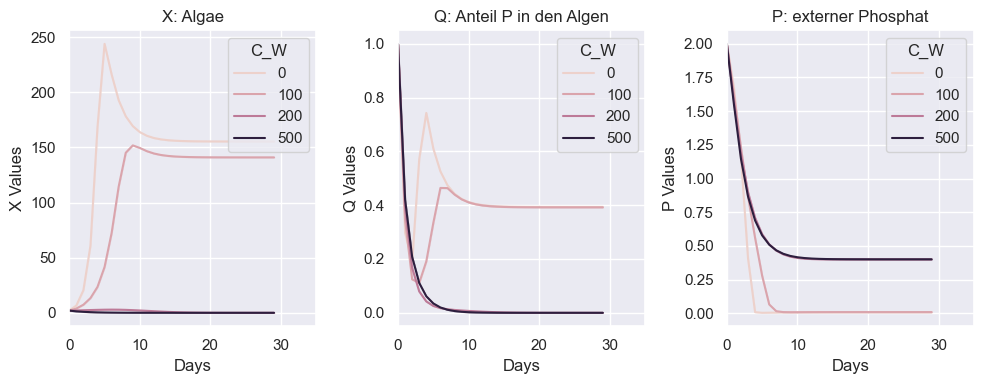

In [12]:
fig, ax = plt.subplots(ncols = 3, figsize = (10,4))

sns.lineplot(data=mout_c, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout_c, x='t_day',y='Q', ax= ax[1], hue='C_W' )
ax[1].set_title('Q: Anteil P in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout_c, x='t_day',y='P', ax= ax[2], hue='C_W' )
ax[2].set_title('P: externer Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].set_xlim(0,35)

plt.tight_layout()
plt.show()

Algen und Daphnien Population

In [ ]:
p.glb['tspan'] = (0,30)
p.glb['N_0'] = 0 #No Daphnia 
p.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
p.glb['Pdot_in'] = 0.4
p.glb['tres'] = 240
p.glb['X0'] = 2
p.glb['Q0'] = .1
p.glb['P0'] = 2
p.glb['C_W'] = 0
sim = simulate_DEBIBM(p) # runs the baseline model (a variant of DEBkiss)
mout_constant, aout = sim 
mout_constant

100%|██████████| 3/3 [00:01<00:00,  2.40it/s]


,index,t_day,X,Q,P,N_tot,M_tot,aging_mortality,starvation_mortality,toxicity_mortality,replicate,C_W
0,0,0.0,2.000000,0.100000,2.000000,0,0.0,0,0,0,0,0
1,1,0.0,2.009839,0.099641,1.997650,0,0.0,0,0,0,0,0
2,2,1.0,6.310857,0.055551,1.530879,0,0.0,0,0,0,0,0
3,3,2.0,18.013052,0.141832,1.134928,0,0.0,0,0,0,0,0
4,4,3.0,53.148122,0.514310,0.574773,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26,26,25.0,314.685198,0.796762,0.003243,0,0.0,0,0,0,2,0
27,27,26.0,314.684302,0.796760,0.003243,0,0.0,0,0,0,2,0
28,28,27.0,314.683758,0.796759,0.003243,0,0.0,0,0,0,2,0
29,29,28.0,314.683429,0.796758,0.003243,0,0.0,0,0,0,2,0


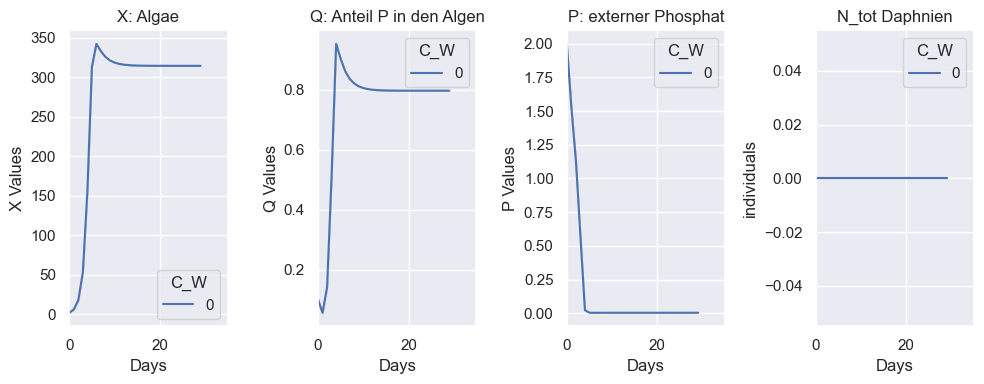

In [20]:
fig, ax = plt.subplots(ncols = 4, figsize = (10,4))

sns.lineplot(data=mout_constant, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout_constant, x='t_day',y='Q', ax= ax[1], hue='C_W' )
ax[1].set_title('Q: Anteil P in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout_constant, x='t_day',y='P', ax= ax[2], hue='C_W' )
ax[2].set_title('P: externer Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].set_xlim(0,35)

sns.lineplot(data=mout_constant, x='t_day',y='N_tot', ax= ax[3], hue='C_W' )
ax[3].set_title('N_tot Daphnien')
ax[3].set_xlabel('Days')
ax[3].set_ylabel('individuals')
ax[3].set_xlim(0,35)

plt.tight_layout()
plt.show()